### Import data and set style to charts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sprt = pd.read_pickle("../data/processed/df_sprt.pkl")

status_chagelog = pd.read_pickle("../data/processed/status_changelog.pkl")

sns.set_style("whitegrid")

sns.set_palette(sns.color_palette("tab10"))

plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "axes.facecolor": "white",
    "figure.facecolor": "white",
    "savefig.facecolor": "white",
    "grid.color": "gray",
    "grid.linestyle": "--"
})


## Created support tickets per Year by Work Category

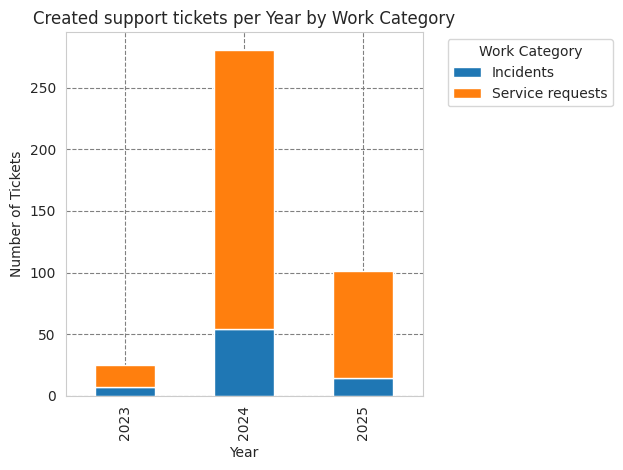

In [ ]:
sprt_year = df_sprt[['Created','Work category']].copy()
sprt_year['Year'] = sprt_year['Created'].dt.year
sprt_year_grouped = sprt_year.groupby(['Year', 'Work category']).size().unstack(fill_value=0)


ax = sprt_year_grouped.plot(
    kind='bar',
    stacked=True
)

plt.title("Created support tickets per Year by Work Category")
plt.xlabel("Year")
plt.ylabel("Number of Tickets")
plt.legend(title="Work Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### The Incident tickets tend to be 10% to 20% of the total volumne of tickets each year. Those tend to be the most critical tickets and we'd absolutly like to keep that as low as possible, although the team currently has no major problems managing this number of Incidents.

## CNSD Created tickets per Year-Month by Work Category

C:\Users\vvdav\AppData\Local\Temp\ipykernel_28732\4254533017.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sprt['Year-Month'] = df_sprt['Created'].dt.to_period('M').astype(str)


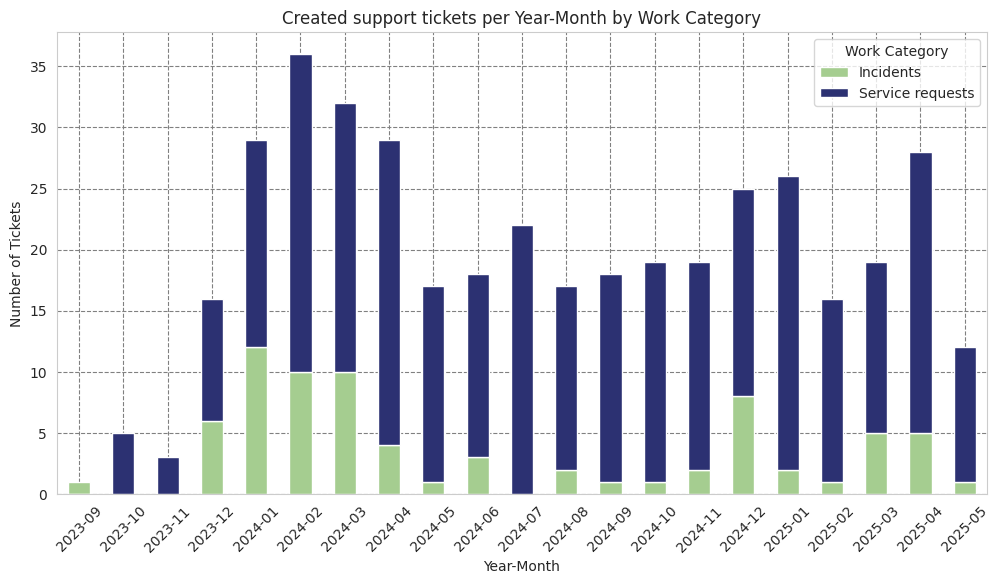

In [ ]:

df_sprt['Year-Month'] = df_sprt['Created'].dt.to_period('M').astype(str)

# Group by Year-Month and Work category
ticket_counts = df_sprt.groupby(['Year-Month', 'Work category']).size().unstack(fill_value=0)


ticket_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='crest')

plt.title('Created support tickets per Year-Month by Work Category')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.legend(title='Work Category')

plt.show()



#### If we take into account the last 12 months of support tickets, we can be confident on expecting 15 to 25 tickets next month.

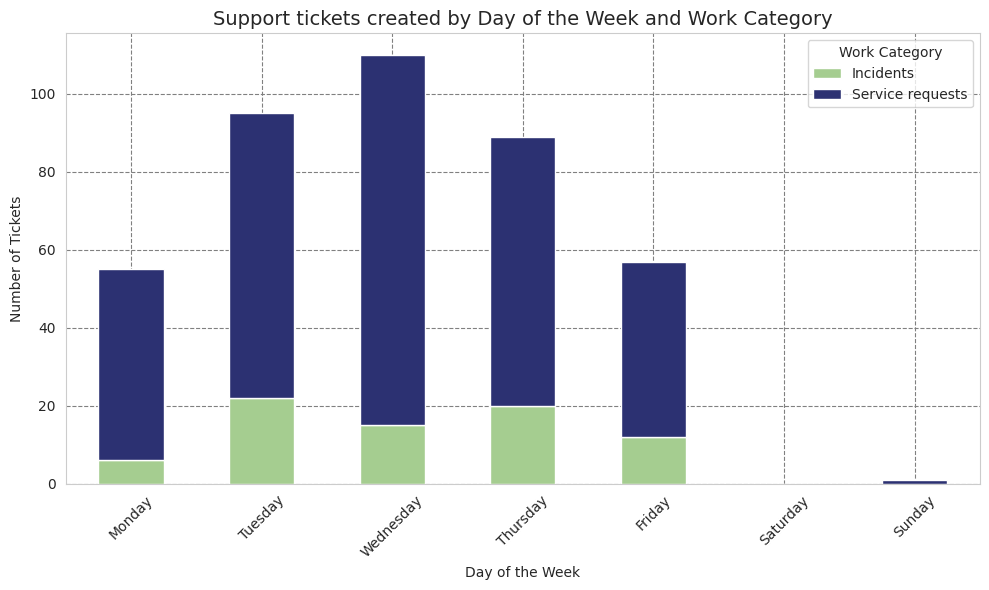

In [ ]:
df_sprt['Weekday'] = df_sprt['Created'].dt.day_name()

# Weekdays order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

grouped = df_sprt.groupby(['Weekday', 'Work category']).size().unstack(fill_value=0)
grouped = grouped.reindex(order)

grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

plt.title("Support tickets created by Day of the Week and Work Category", fontsize=14)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Work Category")
plt.tight_layout()
plt.show()


#### The support tickets are created mostly around the middle of the week, which could signal to expect them more on those days

## Created tickets by hour of the day

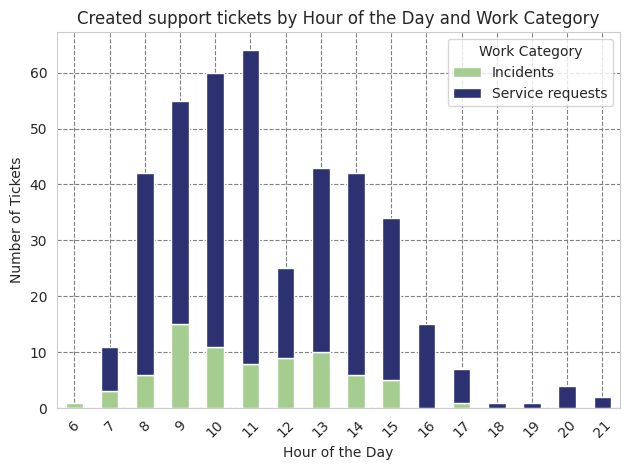

In [ ]:

df_sprt['Created Hour'] = df_sprt['Created'].dt.hour

grouped = df_sprt.groupby(['Created Hour', 'Work category']).size().unstack(fill_value=0)


hour_labels = [f"{h%12 or 12} {'AM' if h < 12 else 'PM'}" for h in grouped.index]


grouped.plot(kind='bar', stacked=True, colormap='crest')

plt.title("Created support tickets by Hour of the Day and Work Category")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.legend(title="Work Category")
plt.tight_layout()
plt.show()


#### Support tickets tend to be created mostly in the early morning, peaking at 11am, just before going to lunch break from which the rate descends steadily